# Driver code

In [7]:
# !pip install -U ipympl

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Raw_Data.bulk_and_open_system_model import get_plots_geometries, get_plots_3d
from sklearn.model_selection import train_test_split

## Getting geometries plots

In [2]:
# Constants
flat_band_on_off = 0
N_band = 2
N = 1
alfa = 0.6
Nx = 24
Ny = Nx
X, Y = np.meshgrid(np.arange(0, Nx, 1), np.arange(0, Ny, 1))
hopping_range = 4
dk = 0.1
kx_vec = np.arange(-np.pi, np.pi, dk)

**Figure 2.1**

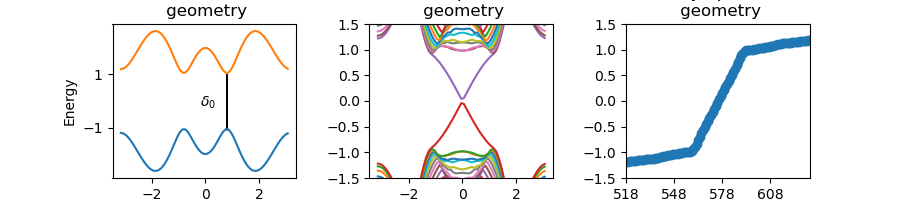

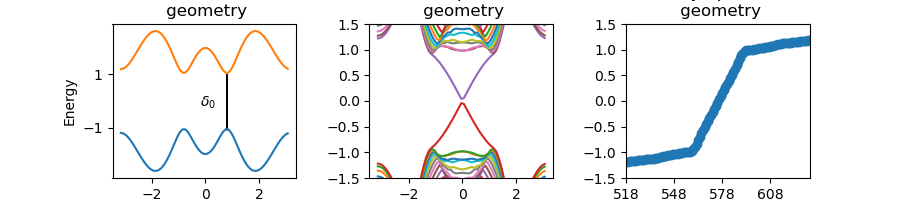

In [5]:
# mu and line_len can be modified to get figures from the tutorial
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)
plt.show()

**Figure 2.2**

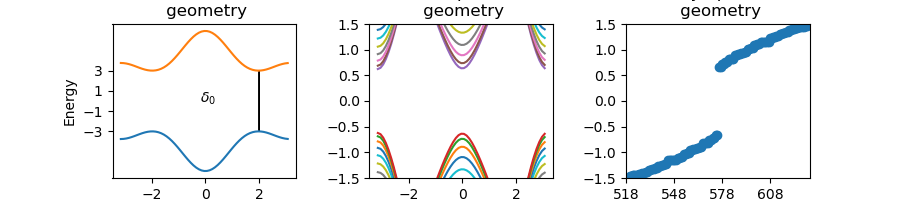

In [6]:
# mu and line_len can be modified to get figures from the tutorial
mu = 3
line_len = [2, -3, 0, 6]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Plot 3**

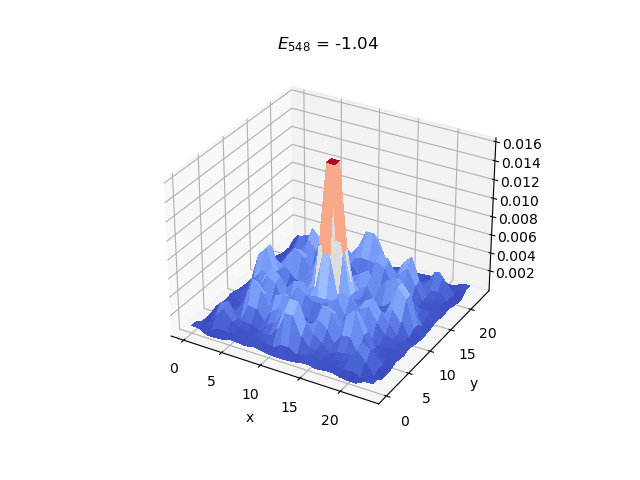

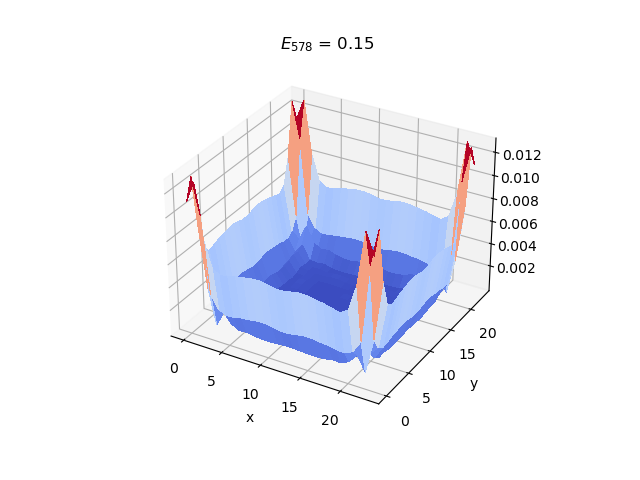

In [7]:
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_3d(Nx, Ny, hopping_range, parameters, X, Y)

## Getting data from Pandas and EDA

Reading data saved prevously

In [8]:
output = pd.read_pickle("Raw_Data/pandas_data_set_Shiba_data.pkl")

We print first 20 rows of the DataFrame to get a sense of what can we encounter there

In [9]:
output.head(20)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,1.0,0.1,3.667,0.644,2.1947,0.0,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,24.0,1.0,2.0,0.1,3.667,0.644,2.1947,0.1,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,24.0,1.0,3.0,0.1,3.667,0.644,2.1947,0.2,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,4.0,0.1,3.667,0.644,2.1947,0.3,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,24.0,1.0,5.0,0.1,3.667,0.644,2.1947,0.4,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,24.0,1.0,6.0,0.1,3.667,0.644,2.1947,0.5,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,24.0,1.0,7.0,0.1,3.667,0.644,2.1947,0.6,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,24.0,1.0,8.0,0.1,3.667,0.644,2.1947,0.7,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,24.0,1.0,9.0,0.1,3.667,0.644,2.1947,0.8,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,24.0,1.0,10.0,0.1,3.667,0.644,2.1947,0.9,0.0,0.0,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
C0 = output[output["Chern_bulk"] == 0]
C1 = output[output["Chern_bulk"] == 1]
C2 = output[output["Chern_bulk"] == 2]
C3 = output[output["Chern_bulk"] == 3]

We can see that even though the bulk chern marker groups have even counts, their dispersions are not even. Group with bulk chern marker 2 is much more dispersed than the other three. We may have slight suspisions that it might be the hardest to spot for the NN later on.

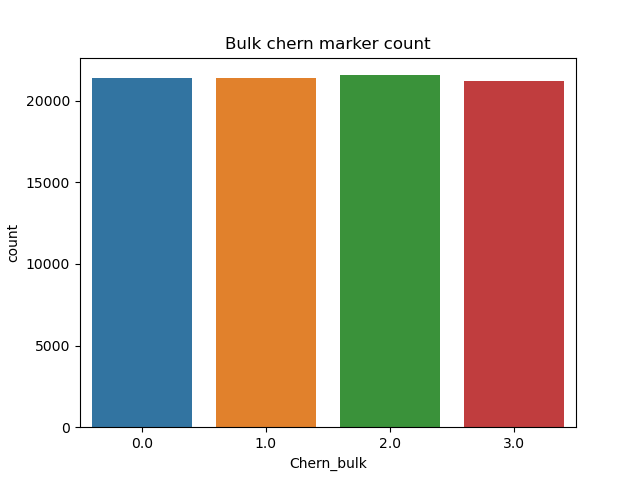

In [10]:
plt.figure()
plt.title("Bulk chern marker count")
sns.countplot(x=output["Chern_bulk"])
plt.show()

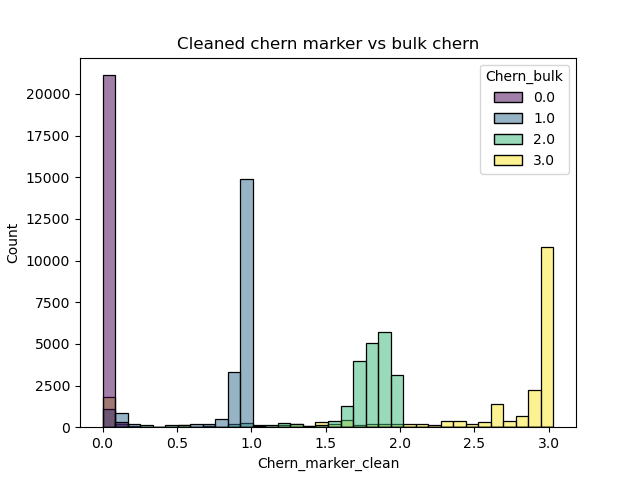

In [11]:
plt.figure()
plt.title("Cleaned chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_clean", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()

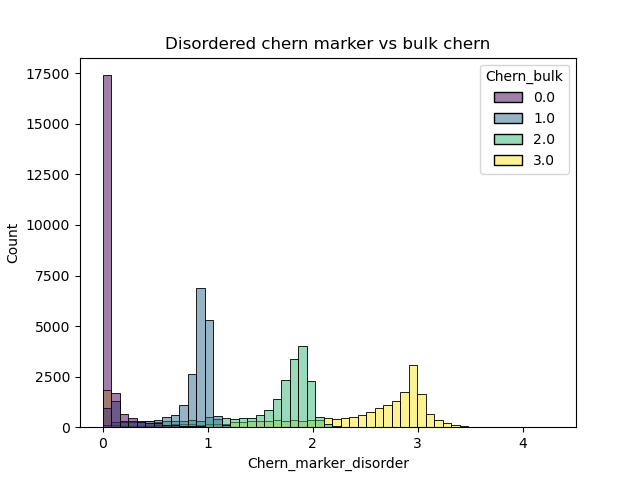

In [12]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()


We set *train* and *test* data sets by train-test-split from sklearn's model selection module with shuffle option enabled
*test* dataset size will be 20% of the raw dataset. Train dataset will be further processed for fine-tuning the model, while the test dataset will be left as is.

In [16]:
test_proc = 0.2
X_train, X_test = train_test_split(output, test_size=test_proc)
print("Shape of the raw data is ", output.shape)
print("Shape of the train data is ", X_train.shape, ", and of the test data ", X_test.shape)


Shape of the raw data is  (85570, 13)
Shape of the train data is  (68456, 13) , and of the test data  (17114, 13)


(68456, 13)

## ML Model Construcion and training

# Code linting

In [13]:
!black Raw_Data

All done! ✨ 🍰 ✨
10 files left unchanged.
